<center> 
    <img src="./logo_UTN.svg" height=”250” width=200”>
</center>

<h1><center> TAREA SEMANAL 4 <center></h1>
    <h2><center> TEORIA DE LOS CIRCUITOS 2<center></h2>
    <h3>Destefano, Martin</h3>


<h4> Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla: </h4>

$$ \omega_{0} = 2\pi22kHz  $$
<center> Q = 5 <center>
Aproximacion Chebyshev con ripple de 0.5 dB 
    
<h4>También se sabe que la transferencia del filtro debe ser:  </h4>
    
<center> T(fS1)=-16 dB para fS1=17 kHz <center>
T(fS2)=-24 dB para fS2=36 kHz
    
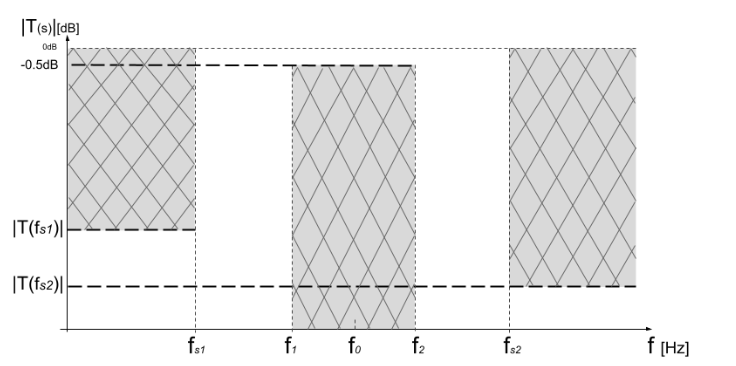

<h2><center>Plantilla pasabanda normalizada<center></h2>
    
    

<h2><center> Transferencia normalizada de pasabajos <center></h2>
Con los datos que nos brinda el ejercicio y sabiendo que: 
   
$$ Q = \frac{\omega_{0}}{BW} $$
    
$$ \omega_{0} = \sqrt{\omega_{1}\omega_{2}} $$
    
$$ K(s) = Q \frac{(S^2+1)}{S} $$
    
Obtengo las frecuencias normalizadas para el pasabajos: 
    
$$ \Omega_{S1} = 2.62 $$
    
$$ \Omega_{S2} = 5.12 $$
    
Y con estos datos y Python hallo el valor de n y epsilon, en el caso del primero voy a tener dos valores posibles, de los cuales tomare el mas alto para cumplir con ambas especificaciones. 

In [21]:
# Calculo epsilon y n

import numpy as np 


alfa_max = 0.5
ws = 12 
wp = 45

omega_s1 = 2.62 
omega_s2 = 5.12

# cuentas auxiliares

ee = 10**(alfa_max/10)-1

print ("Epsilon cuadrado ", ee)
for nn in range(2,6):
    
    alfa_min_c1 = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(omega_s1))**2 )
    alfa_min_c2 = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(omega_s2))**2 )
    
    print( 'nn {:d} - alfa_min_c1 {:f} - alfa_min_c2 {:f}'.format(nn, alfa_min_c1, alfa_min_c2) )

Epsilon cuadrado  0.12201845430196334
nn 2 - alfa_min_c1 13.174306 - alfa_min_c2 25.101819
nn 3 - alfa_min_c1 27.007217 - alfa_min_c2 45.209654
nn 4 - alfa_min_c1 41.049849 - alfa_min_c2 65.331470
nn 5 - alfa_min_c1 55.100959 - alfa_min_c2 85.453422


Con estos datos planteo: 

$$ |T(S)|^2 = \frac{1}{1+\epsilon^2*(4\omega^3-3\omega)^2} $$

Hago el calculo de coeficientes a partir de T(s)T(-s): 

$$ 4\epsilon = a $$
$$ 1.75 = b $$ 
$$ 2.144 = c $$ 
$$ 1 = d $$ 

Finalmente la funcion de transferencia pasabajos normalizada queda: 

$$ T(S) = \frac{0.626}{S+0.626} \frac{1.142}{S^2 + 0.626 + 1.142} $$

La cual comprobamos a continuacion: 

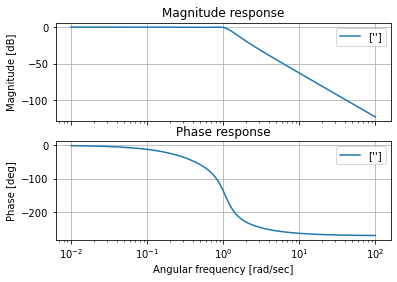

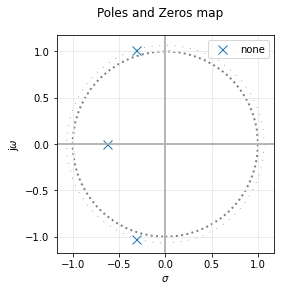

In [25]:
import scipy.signal as sig
import splane as sp

myFilter = sig.TransferFunction([1], [1.397, 1.75, 2.14, 1])

sp.bodePlot(myFilter)

sp.pzmap(myFilter)

print ("")

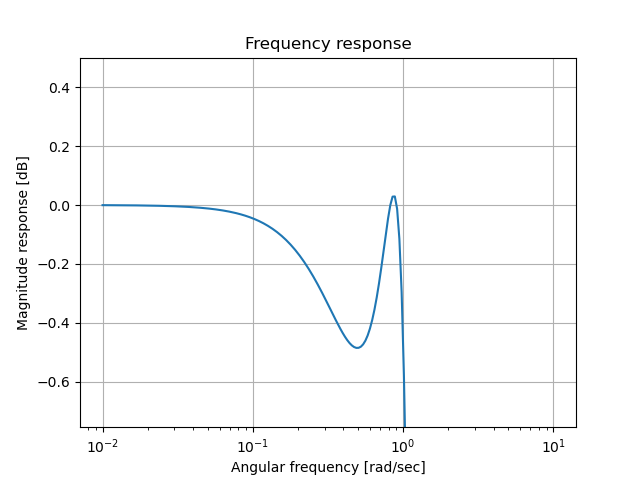

Se muestra el grafico de magnitud para observar tanto el ripple del pasabajos que se correspondera con el pasabanda como tambien la cantidad de "toques" correspondiente a la aproximacion de Chebyshev. 

<h2><center> Transferencia normalizada pasabanda <center></h2>

Una vez que llegamos a la expresion para el pasabajos, nos encargaremos de aplicar el nucleo de transformacion para llevarlo a la forma de pasabajos. 

Recordamos el nucleo: 

$$ K(s) = Q \frac{(S^2+1)}{S} $$

Reemplazando y trabajando algebraicamente: 

$$ \frac{S0.626}{QS^2+0.626S+Q}\frac{1.142S^2}{Q^2S^4+Q^22S^2+Q^2+0.626QS^3+0.626QS+1.142S^2} $$

Puedo calcular los polos (mediante un script de Python o calculadora) para separar en tres SOS la expresion: 

$$ 12.02 \frac{0.125S}{S^2+0.125S+1} \frac{0.056S}{S^2+0.056S+0.814} \frac{0.068S}{S^2+0.068S+1.22} $$

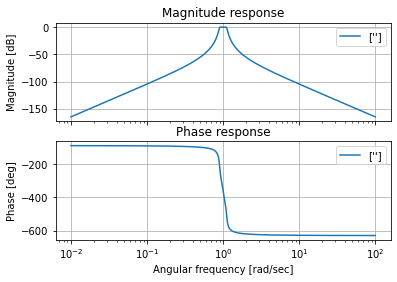

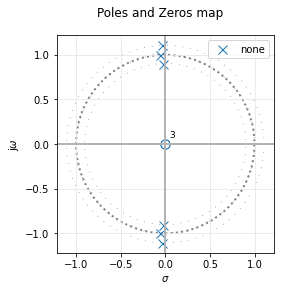

In [31]:
import scipy.signal as sig
import splane as sp

Q = 5
poly_mul = np.polymul([Q, 0.626, Q], [Q**2, 0.626*Q, 2*Q**2+1.142, 0.626*Q, Q**2])
myFilter = sig.TransferFunction([0.626*1.142, 0, 0, 0], poly_mul)

sp.bodePlot(myFilter)

sp.pzmap(myFilter)

print ("")

<h2><center> Implementar mediante secciones pasivas separadas por seguidores de tensión activos <center></h2>

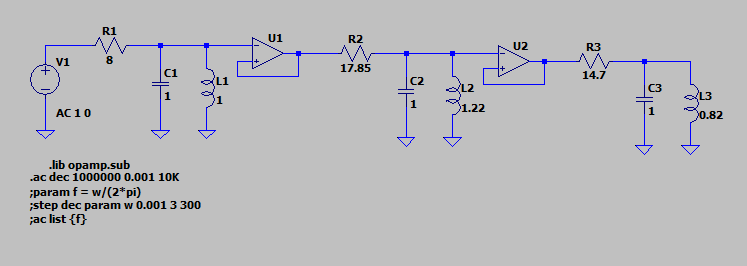

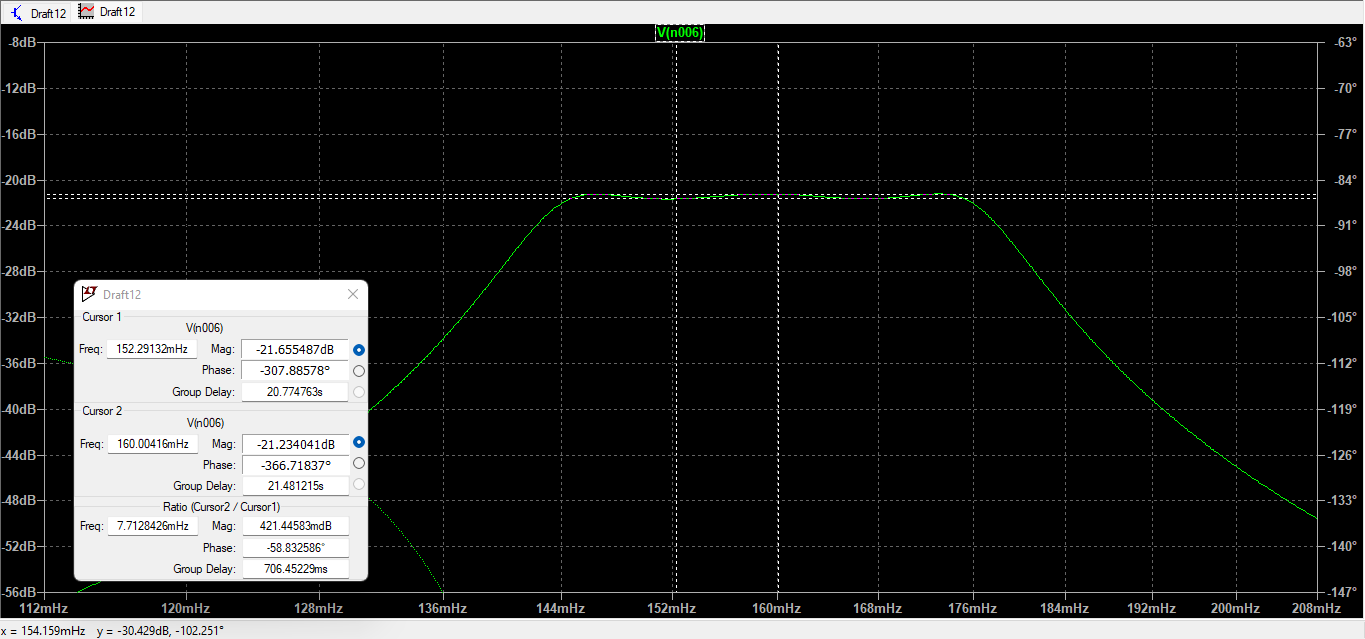
Como podemos observar estan presentes los tres "toques" en la banda de paso, caracteristicos de Chebyshev como tambien se cumple con el maximo ripple especificado (0.5 dB). La tension parece ser atenuada ya que no se estan teniendo en cuenta las etapas de ganancias que vimos en las formulas calculadas a mano. 

Verificamos las atenuaciones en las frecuencias de stop 
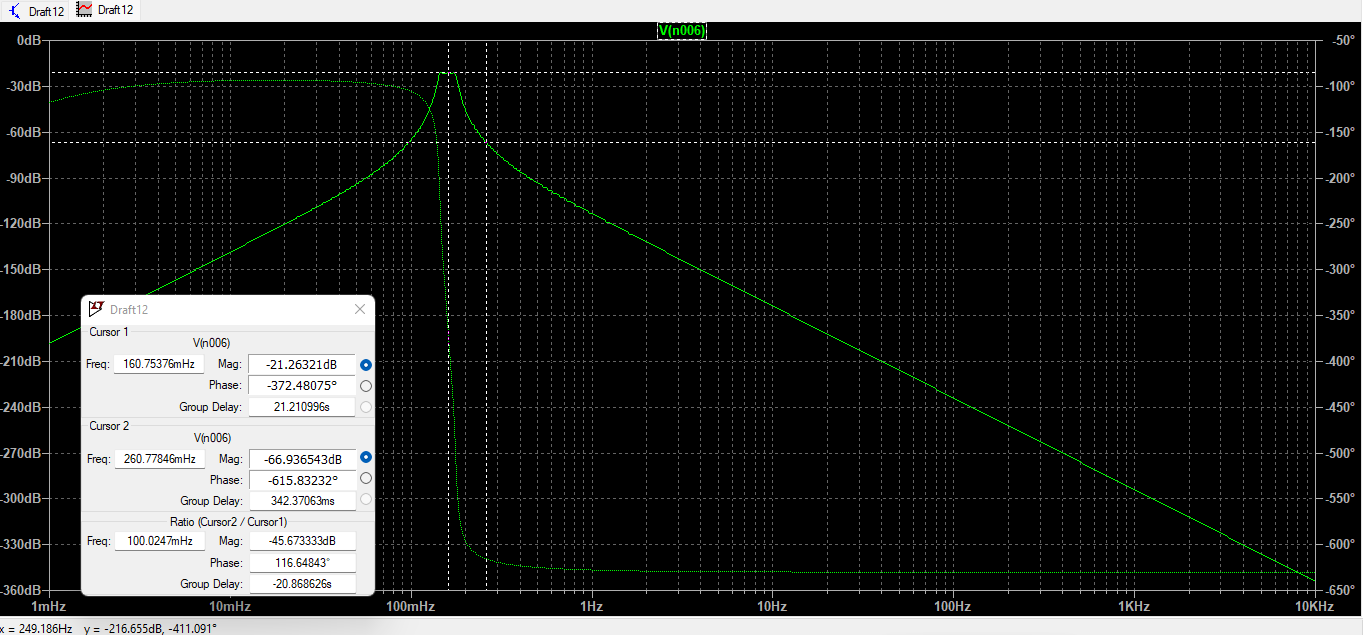
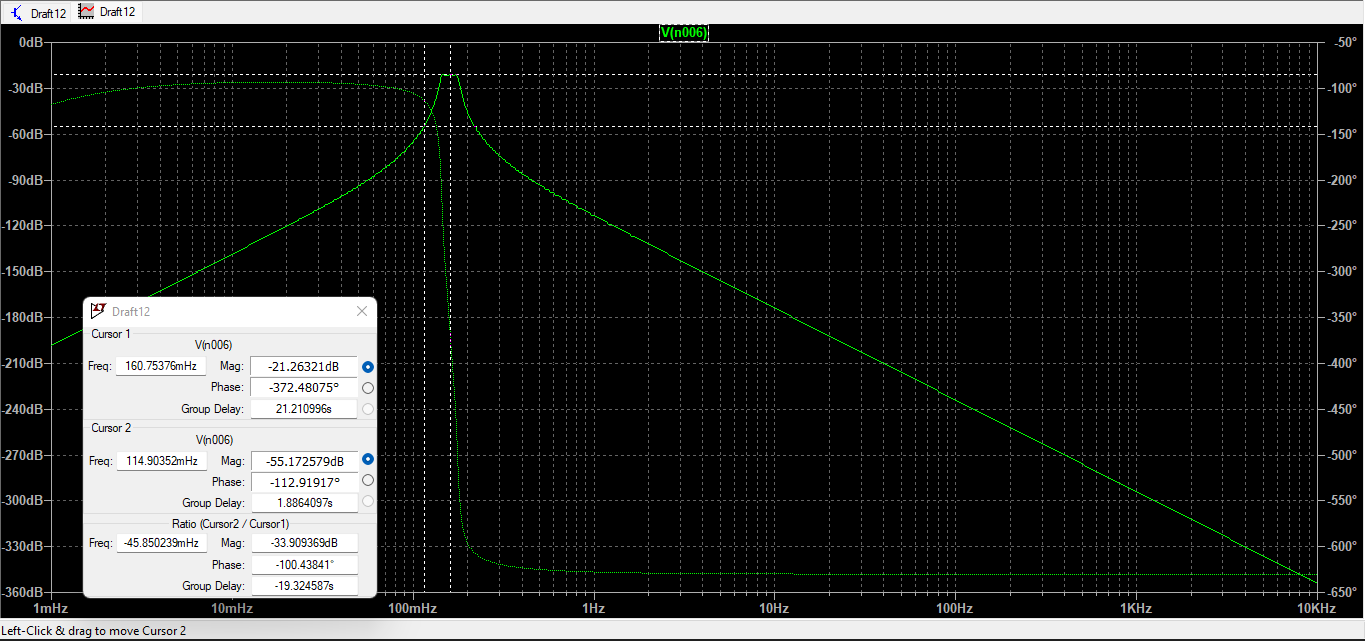

<h2><center> Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado <center></h2>